<a href="https://colab.research.google.com/github/Haythemmighri/-2DPythonGame/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First type of code using CNN




Import the necessary packages that we're going to use

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.15.0


In [2]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [9]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [10]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [12]:
data = pd.concat([fraud, non_fraud], ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,65690.0,1.219830,0.446352,-0.009583,1.040637,-0.017739,-0.989236,0.443639,-0.213455,-0.530711,...,0.066327,0.204903,-0.130716,0.552649,0.790569,-0.326023,-0.012399,0.002519,1.49,0
980,61066.0,-0.896752,0.327909,0.802756,-0.834631,1.223573,-0.023624,1.309704,-0.070354,-0.640551,...,-0.277760,-0.890803,0.163132,-0.880796,-0.182681,0.008300,0.073169,-0.053845,101.90,0
981,50952.0,-2.916960,1.278352,1.242893,1.013765,-1.281227,-0.143814,-1.292787,1.627285,-0.046259,...,0.103785,0.716859,0.358613,0.321981,0.667100,-0.077243,0.284087,-0.064389,1.23,0
982,58742.0,1.311496,0.364396,-0.117437,0.879700,0.257425,-0.380511,0.229933,-0.194737,-0.016111,...,-0.032280,-0.023195,-0.230517,-0.598093,0.836211,-0.267721,0.014942,0.011479,6.44,0


In [13]:
data['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [14]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [16]:
X_train.shape, X_test.shape


((787, 30), (197, 30))

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [19]:
X_train.shape


(787, 30)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

BUILD CNN

In [22]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 29, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [24]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 3s 24ms/step - loss: 0.4504 - accuracy: 0.8653 - val_loss: 0.5517 - val_accuracy: 0.8071
Epoch 2/20
25/25 [==============================] - 0s 14ms/step - loss: 0.2533 - accuracy: 0.9199 - val_loss: 0.5295 - val_accuracy: 0.6853
Epoch 3/20
25/25 [==============================] - 0s 12ms/step - loss: 0.2213 - accuracy: 0.9314 - val_loss: 0.5383 - val_accuracy: 0.5431
Epoch 4/20
25/25 [==============================] - 0s 12ms/step - loss: 0.1907 - accuracy: 0.9403 - val_loss: 0.5303 - val_accuracy: 0.5533
Epoch 5/20
25/25 [==============================] - 0s 12ms/step - loss: 0.1619 - accuracy: 0.9454 - val_loss: 0.5100 - val_accuracy: 0.6294
Epoch 6/20
25/25 [==============================] - 0s 11ms/step - loss: 0.1869 - accuracy: 0.9377 - val_loss: 0.5174 - val_accuracy: 0.5787
Epoch 7/20
25/25 [==============================] - 0s 14ms/step - loss: 0.1604 - accuracy: 0.9454 - val_loss: 0.4254 - val_accuracy: 0.8122
Epoch 8/20
25

In [26]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

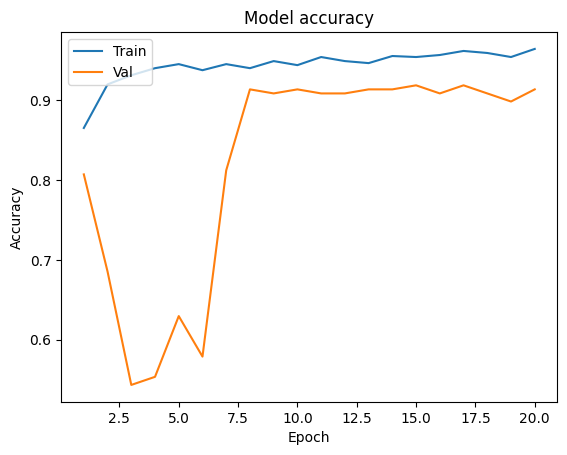

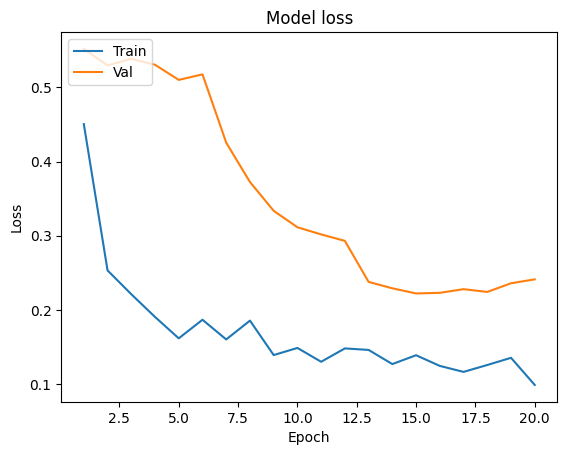

In [27]:
plot_learningCurve(history, epochs)

Adding MaxPool

Epoch 1/50
25/25 [==============================] - 2s 17ms/step - loss: 0.6542 - accuracy: 0.7255 - val_loss: 0.5409 - val_accuracy: 0.8376
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 0.3233 - accuracy: 0.8666 - val_loss: 0.4964 - val_accuracy: 0.8426
Epoch 3/50
25/25 [==============================] - 0s 9ms/step - loss: 0.2586 - accuracy: 0.9111 - val_loss: 0.4571 - val_accuracy: 0.8629
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 0.2696 - accuracy: 0.9034 - val_loss: 0.4027 - val_accuracy: 0.8629
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 0.2348 - accuracy: 0.9199 - val_loss: 0.3678 - val_accuracy: 0.8731
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 0.2503 - accuracy: 0.9174 - val_loss: 0.3313 - val_accuracy: 0.8832
Epoch 7/50
25/25 [==============================] - 0s 9ms/step - loss: 0.2342 - accuracy: 0.9339 - val_loss: 0.3084 - val_accuracy: 0.8985
Epoch 8/50
25/25 [=

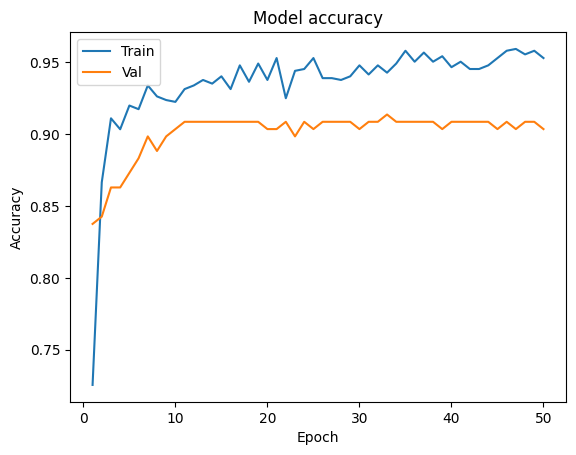

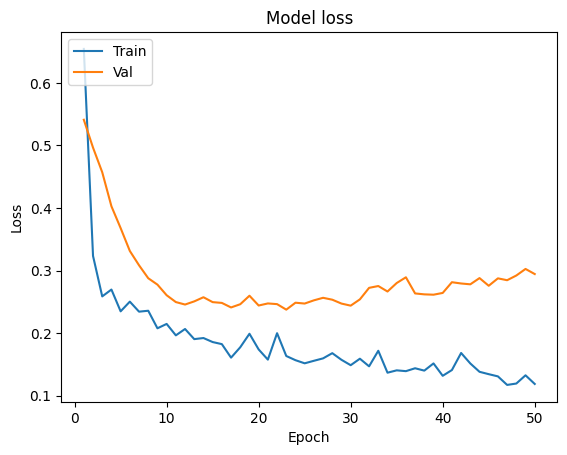

In [28]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

In [29]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
